In [2]:
from sympy import *
init_printing(use_latex=true)

t1,t2,t3,d1,l2,l3 = symbols('\\theta_1, \\theta_2, \\theta_3, d_1, l_2, l_3')
x,y,z = symbols('x,y,z')


def dhs(a,alpha,d,theta):
    M = Matrix([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

In [3]:
T3_0 = dhs(0,pi/2,0,t1)*dhs(l2,0,0,t2)*dhs(l3,0,0,t3)
xx = simplify(T3_0[0,3])
yy = simplify(T3_0[1,3])
zz = simplify(T3_0[2,3])

In [4]:
simplify(xx**2 + yy**2+zz**2)

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import sin,cos,tan,arcsin,arccos,arctan,arctan2,sqrt,pi
%matplotlib notebook

def dh(a,alpha,d,theta):
    M = np.array([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

<IPython.core.display.Javascript object>


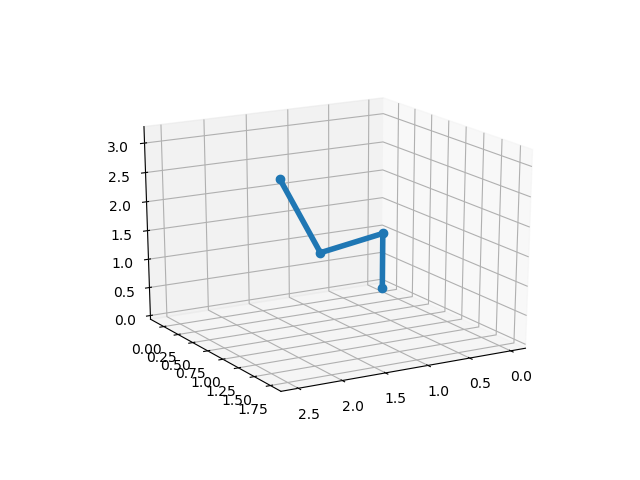

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# IK
x,y,z = 3,2,2
d1,l2,l3 = 1,2,2
t1 = arctan2(y,x)
K1 = (x**2 + y**2 + z**2 - 2*d1*z + d1**2 - l2**2 - l3**2)/(2*l2*l3)
t3 = arctan2(sqrt(1-K1**2),K1)
s,r = (z-d1),sqrt(x**2+y**2)
t2 = arctan2(s,r)#arctan2(s*l2 + s*l3*cos(t3) - r*l3*sin(t3), r*l2 + r*l3*cos(t3) + s*l3*sin(t3))

# FK
T1_0 = dh(0,pi/2,d1,t1)
T2_1 = dh(l2,0,0,t2)
T3_2 = dh(l3,0,0,t3)
T2_0 = np.dot(T1_0,T2_1)
T3_0 = np.dot(T2_0,T3_2)
A = np.array([T1_0[0][3],T1_0[1][3],T1_0[2][3]])
B = np.array([T2_0[0][3],T2_0[1][3],T2_0[2][3]])
C = np.array([T3_0[0][3],T3_0[1][3],T3_0[2][3]])
ax.plot([0,A[0],B[0],C[0]],[0,A[1],B[1],C[1]],[0,A[2],B[2],C[2]],'-o',lw=4)
plt.axis('equal')
ax.view_init(20,60)

<IPython.core.display.Javascript object>


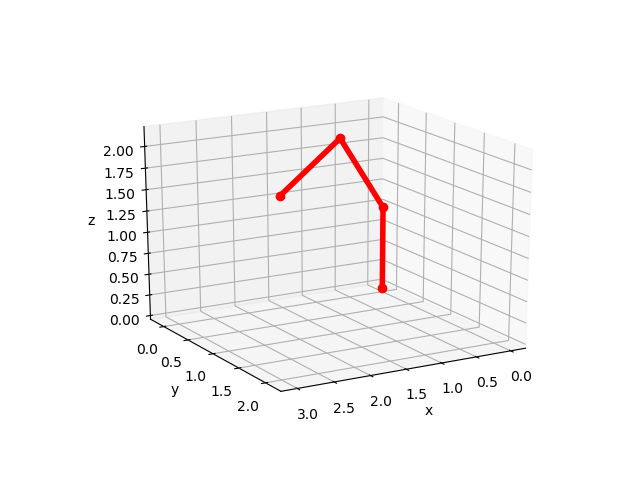

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# IK
t1 = arctan2(y,x)
K1 = (x**2 + y**2 + z**2 - 2*d1*z + d1**2 - l2**2 - l3**2)/(2*l2*l3)
t3 = arctan2(-sqrt(1-K1**2),K1)
s,r = (z-d1),sqrt(x**2+y**2)
t2 = arctan2(s*l2 + s*l3*cos(t3) - r*l3*sin(t3), r*l2 + r*l3*cos(t3) + s*l3*sin(t3))

# FK
T1_0 = dh(0,pi/2,d1,t1)
T2_1 = dh(l2,0,0,t2)
T3_2 = dh(l3,0,0,t3)
T2_0 = np.dot(T1_0,T2_1)
T3_0 = np.dot(T2_0,T3_2)
A = np.array([T1_0[0][3],T1_0[1][3],T1_0[2][3]])
B = np.array([T2_0[0][3],T2_0[1][3],T2_0[2][3]])
C = np.array([T3_0[0][3],T3_0[1][3],T3_0[2][3]])
ax.plot([0,A[0],B[0],C[0]],[0,A[1],B[1],C[1]],[0,A[2],B[2],C[2]],'r-o',lw=4)
ax.set_xlabel('x'),ax.set_ylabel('y'),ax.set_zlabel('z')
plt.axis('equal');
ax.view_init(20,60)

## Follow path

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

t = np.linspace(0,2*pi,20)
Z = cos(t) + 1.5
X = sin(t) + 1.5
Y = np.ones_like(t)

# IK
for k in range(len(t)):
    x,y,z = X[k],Y[k],Z[k]
    t1 = arctan2(y,x)
    K1 = (x**2 + y**2 + z**2 - 2*d1*z + d1**2 - l2**2 - l3**2)/(2*l2*l3)
    t3 = arctan2(-sqrt(1-K1**2),K1)
    s,r = (z-d1),sqrt(x**2+y**2)
    t2 = arctan2(s*l2 + s*l3*cos(t3) - r*l3*sin(t3), r*l2 + r*l3*cos(t3) + s*l3*sin(t3))

    # FK
    T1_0 = dh(0,pi/2,d1,t1)
    T2_1 = dh(l2,0,0,t2)
    T3_2 = dh(l3,0,0,t3)
    T2_0 = np.dot(T1_0,T2_1)
    T3_0 = np.dot(T2_0,T3_2)
    A = np.array([T1_0[0][3],T1_0[1][3],T1_0[2][3]])
    B = np.array([T2_0[0][3],T2_0[1][3],T2_0[2][3]])
    C = np.array([T3_0[0][3],T3_0[1][3],T3_0[2][3]])
    ax.plot([0,A[0],B[0],C[0]],[0,A[1],B[1],C[1]],[0,A[2],B[2],C[2]],color="#FFAAAA",lw=1)
    ax.plot([C[0]],[C[1]],[C[2]],"bo")
    ax.set_xlabel('x'),ax.set_ylabel('y'),ax.set_zlabel('z')
    plt.axis('equal');
    ax.view_init(10,60)